In [1]:
!pip install NRCLex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 396 kB 5.6 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=47910fdea23883ac03415195a96acbf75400e8514893060bf9ff33cfff297122
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
from nrclex import NRCLex
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# link = 'https://drive.google.com/file/d/1zB7FDPKT-K_HyK5gwv6042-W16udBvgo/view?usp=share_link
id = '1zB7FDPKT-K_HyK5gwv6042-W16udBvgo'

In [6]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('UkTweets_new.csv',)  


In [7]:
df = pd.read_csv('UkTweets_new.csv',index_col=[0])
df

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...


In [8]:
newdata = df.copy()
newdata

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...


In [ ]:
# newdata = newdata.drop('Unnamed: 0', axis=1)
# newdata

In [9]:
eng_data = newdata[newdata['author_location'].str.contains('England|Britain',na = False, case=False)]
eng_data

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
5,1696846248,thedragonaunt,"South East, England",RT @TrussellTrust: Brian sees the impact of th...,2022-03-30 23:44:30+00:00,NaN,5.0,0.0,0.0,0.0,brian see impact costoflivingcrisis every time...
...,...,...,...,...,...,...,...,...,...,...,...
541720,1315323725752021002,Beatric74811356,"Leeds, England",RT @frogcrutches: #BorisJohnson plans to visit...,2022-09-01 00:47:55+00:00,NaN,502.0,0.0,0.0,0.0,borisjohnson plan visit site great achievement
541722,1250312438,oxfordstadium,"Oxford, England",RT @iCreativeIram: Happy Wednesday. Lots of fo...,2022-09-01 00:41:12+00:00,NaN,6.0,0.0,0.0,0.0,happy wednesday lot food donate world crate ex...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...


In [11]:
eng_tweets = eng_data[['Cleaned_tweets']]
eng_tweets

,Cleaned_tweets
0,cost living crisis political choice yet tory t...
1,costoflivingcrisis stateimposedpoverty do quit...
2,every non tory mp stand today call borisjohnso...
4,serious question scottish power say energy gre...
5,brian see impact costoflivingcrisis every time...
...,...
541720,borisjohnson plan visit site great achievement
541722,happy wednesday lot food donate world crate ex...
541723,honestly think liztruss plan cost living crisis
541725,jesus billion excess profit yrs time take stre...


In [ ]:
# emotion1 = eng_tweets[:10000]
# emotion1

,Cleaned tweets
2,zahawi just confirmed we get of our gas from ...
4,i went on holiday for a week and turned most ...
7,as editor of the spectator boris johnson love...
8,boris johnson one of the favourites to be nex...
9,no wonder greghands has been doing media this ...
...,...
16465,liz truss celebrating another great week at w...
16466,i can boil your blood in minutes kwasibudget ...
16467,if you thought borisjohnson was the worst pm ...
16469,a huge turnout in newcastle this afternoon fo...


In [13]:
eng_tweets['emotions'] = eng_tweets['Cleaned_tweets'].apply(lambda x: NRCLex(x).top_emotions[0])
eng_tweets.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Cleaned_tweets,emotions
0,cost living crisis political choice yet tory t...,"(positive, 0.42857142857142855)"
1,costoflivingcrisis stateimposedpoverty do quit...,"(fear, 0.0)"
2,every non tory mp stand today call borisjohnso...,"(negative, 0.4)"
4,serious question scottish power say energy gre...,"(positive, 0.5)"
5,brian see impact costoflivingcrisis every time...,"(trust, 0.3)"


In [14]:
eng_tweets = pd.concat([eng_tweets.drop(['emotions'], axis = 1), eng_tweets['emotions'].apply(pd.Series)], axis = 1)
eng_tweets.head()

,Cleaned_tweets,0,1
0,cost living crisis political choice yet tory t...,positive,0.428571
1,costoflivingcrisis stateimposedpoverty do quit...,fear,0.000000
2,every non tory mp stand today call borisjohnso...,negative,0.400000
4,serious question scottish power say energy gre...,positive,0.500000
5,brian see impact costoflivingcrisis every time...,trust,0.300000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
emotion_counts= eng_tweets[0].value_counts()
emotion_counts

fear            96831
positive        76645
trust           61607
negative        47927
anger           19344
anticipation    11546
surprise         8599
sadness          1618
disgust           486
joy                45
Name: 0, dtype: int64

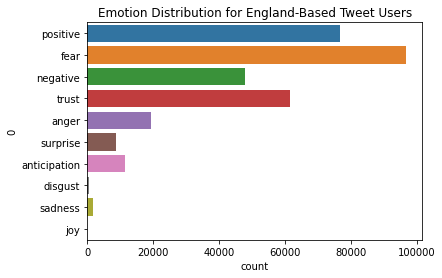

In [17]:
sns.countplot(data = eng_tweets, y = 0).set_title("Emotion Distribution for England-Based Tweet Users")
plt.savefig('EnglandEmotion.png')

### Emotion detection for Wales Authors

In [18]:
wales_data = newdata[newdata['author_location'].str.contains('Wales',na = False, case=False)]
wales_data

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
68,3386406213,fjbeecher,Wales,RT @clairebubblepop: Just a reminder to leaver...,2022-03-30 22:09:28+00:00,NaN,10.0,0.0,0.0,0.0,reminder leaver david cameron call brexit refe...
72,4849198792,Robby5211,West Wales,RT @jannycat: Didn't we just know this would h...,2022-03-30 22:04:34+00:00,NaN,22.0,0.0,0.0,0.0,know would happen tweet since moneygrabber nod...
73,1386964028237492226,clairebubblepop,"Bangor, Wales",Just a reminder to leavers that David Cameron ...,2022-03-30 22:03:25+00:00,NaN,10.0,0.0,16.0,0.0,reminder leaver david cameron call brexit refe...
93,1643254398,lindadavies56,Wales🏴󠁧󠁢󠁷󠁬󠁳󠁿,RT @DingaBelle: 👋 #ConsciousCruelty #Poverty #...,2022-03-30 21:46:12+00:00,NaN,25.0,0.0,0.0,0.0,consciouscruelty poverty statepension triplelo...
110,2426853665,peterharris567,Wales,"RT @JerryHicksUnite: I would like to know, wou...",2022-03-30 21:33:51+00:00,NaN,26.0,0.0,0.0,0.0,would like know would pay last night lavish di...
...,...,...,...,...,...,...,...,...,...,...,...
541665,3064752519,satuhaikala1,"Wales, United Kingdom",RT @MichaelMarmot: New @MarmotIHE review warns...,2022-09-01 05:06:08+00:00,NaN,338.0,0.0,0.0,0.0,new review warn epidemic level fuelpoverty cau...
541688,149697436,Hayleywest8,North Wales UK,"During this #CostOfLivingCrisis, many small bu...",2022-09-01 04:13:46+00:00,NaN,0.0,0.0,1.0,0.0,costoflivingcrisis many small business close f...
541707,563903307,david_o_gabriel,Wales,"Hello @trussliz @RishiSunak Just a thought, bu...",2022-09-01 01:23:25+00:00,NaN,0.0,0.0,1.0,0.0,hello think rather good one conservativeleader...
541714,19034921,tomcarding,"Sydney, New South Wales",RT @PhoneBoxPimp: #TheQueen #LizTruss #RishiSu...,2022-09-01 01:00:41+00:00,NaN,1.0,0.0,0.0,0.0,thequeen liztruss rishisunak


In [20]:
wales_tweets = wales_data[['Cleaned_tweets']]
wales_tweets

,Cleaned_tweets
68,reminder leaver david cameron call brexit refe...
72,know would happen tweet since moneygrabber nod...
73,reminder leaver david cameron call brexit refe...
93,consciouscruelty poverty statepension triplelo...
110,would like know would pay last night lavish di...
...,...
541665,new review warn epidemic level fuelpoverty cau...
541688,costoflivingcrisis many small business close f...
541707,hello think rather good one conservativeleader...
541714,thequeen liztruss rishisunak


In [21]:
wales_tweets['emotions'] = wales_tweets['Cleaned_tweets'].apply(lambda x: NRCLex(x).top_emotions[0])
wales_tweets.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Cleaned_tweets,emotions
68,reminder leaver david cameron call brexit refe...,"(fear, 0.2)"
72,know would happen tweet since moneygrabber nod...,"(anticipation, 1.0)"
73,reminder leaver david cameron call brexit refe...,"(fear, 0.2)"
93,consciouscruelty poverty statepension triplelo...,"(fear, 0.2)"
110,would like know would pay last night lavish di...,"(positive, 0.5)"


In [22]:
wales_tweets = pd.concat([wales_tweets.drop(['emotions'], axis = 1), wales_tweets['emotions'].apply(pd.Series)], axis = 1)
wales_tweets.head()

,Cleaned_tweets,0,1
68,reminder leaver david cameron call brexit refe...,fear,0.2
72,know would happen tweet since moneygrabber nod...,anticipation,1.0
73,reminder leaver david cameron call brexit refe...,fear,0.2
93,consciouscruelty poverty statepension triplelo...,fear,0.2
110,would like know would pay last night lavish di...,positive,0.5


In [23]:
emotion_counts= wales_tweets[0].value_counts()
emotion_counts

fear            11429
positive         8917
trust            7409
negative         5639
anger            2203
anticipation     1240
surprise          999
sadness           197
disgust            39
joy                 3
Name: 0, dtype: int64

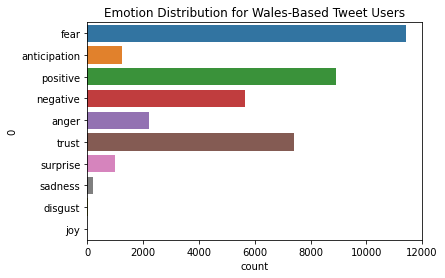

In [24]:
sns.countplot(data = wales_tweets, y = 0).set_title("Emotion Distribution for Wales-Based Tweet Users")
plt.savefig('WalesEmotion.png')

### Emotion Detection for Scotland Authors

In [25]:
scot_data = newdata[newdata['author_location'].str.contains('Scotland',na = False, case=False)]
scot_data

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
6,2716865316,AuldGrannie,"Edinburgh, Scotland",#CONSERVATIVE #SNP #FerryFiasco #NHS #Ukraine ...,2022-03-30 23:42:29+00:00,NaN,0.0,0.0,2.0,0.0,conservative snp ferryfiasco nhs ukraine boris...
8,14750664,aigwilson,Scotland,"@julianHjessop @MerrynSW Worth repeating, than...",2022-03-30 23:31:21+00:00,NaN,8.0,1.0,16.0,1.0,worth repeat thank know costoflivingcrisis hea...
23,21245130,elisa2378,"Glasgow, Scotland",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:02:19+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
54,809439294,wrmkay,"Durisdeer, Scotland",RT @jo31070: @ScotNational @Camz99 @NicolaStur...,2022-03-30 22:20:07+00:00,NaN,6.0,0.0,0.0,0.0,wait set date live long enough costoflivingcri
62,479815857,jtdessie,Scotland,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 22:12:27+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...
...,...,...,...,...,...,...,...,...,...,...,...
541703,742732369497587712,AwayFromTheKeys,"Scotland, Europe",@Edwina_Currie This will be hard for you as a ...,2022-09-01 02:22:35+00:00,NaN,0.0,0.0,5.0,0.0,hard tory time shut listen better know far liv...
541709,1418314766729289729,dree_kelly,Scotland uk,RT @NonFlyingLCA: UK strikes at the moment:\n-...,2022-09-01 01:13:56+00:00,NaN,1.0,0.0,0.0,0.0,uk strike moment mail port train driver lawyer...
541719,3781637955,mossy_fern,"Glasgow, Scotland",RT @SueSuezep: #CostOfLivingCrisis https://t.c...,2022-09-01 00:51:43+00:00,NaN,74.0,0.0,0.0,0.0,costoflivingcrisis
541721,22022545,naliac,"Scotland, United Kingdom",RT @GrahamGGrant: A bitter old trouper nearing...,2022-09-01 00:41:55+00:00,NaN,129.0,0.0,0.0,0.0,bitter old troup near end career define failur...


In [26]:
scot_tweets = scot_data[['Cleaned_tweets']]
scot_tweets

,Cleaned_tweets
6,conservative snp ferryfiasco nhs ukraine boris...
8,worth repeat thank know costoflivingcrisis hea...
23,costoflivingcrisis stateimposedpoverty do quit...
54,wait set date live long enough costoflivingcri
62,ian blackford own show always tory care costof...
...,...
541703,hard tory time shut listen better know far liv...
541709,uk strike moment mail port train driver lawyer...
541719,costoflivingcrisis
541721,bitter old troup near end career define failur...


In [27]:
scot_tweets['emotions'] = scot_tweets['Cleaned_tweets'].apply(lambda x: NRCLex(x).top_emotions[0])
scot_tweets.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Cleaned_tweets,emotions
6,conservative snp ferryfiasco nhs ukraine boris...,"(fear, 0.0)"
8,worth repeat thank know costoflivingcrisis hea...,"(positive, 0.42857142857142855)"
23,costoflivingcrisis stateimposedpoverty do quit...,"(fear, 0.0)"
54,wait set date live long enough costoflivingcri,"(anticipation, 0.6666666666666666)"
62,ian blackford own show always tory care costof...,"(trust, 1.0)"


In [28]:
scot_tweets = pd.concat([scot_tweets.drop(['emotions'], axis = 1), scot_tweets['emotions'].apply(pd.Series)], axis = 1)
scot_tweets.head()

,Cleaned_tweets,0,1
6,conservative snp ferryfiasco nhs ukraine boris...,fear,0.000000
8,worth repeat thank know costoflivingcrisis hea...,positive,0.428571
23,costoflivingcrisis stateimposedpoverty do quit...,fear,0.000000
54,wait set date live long enough costoflivingcri,anticipation,0.666667
62,ian blackford own show always tory care costof...,trust,1.000000


In [29]:
emotion_counts= scot_tweets[0].value_counts()
emotion_counts

fear            27267
positive        17984
trust           15575
negative        11383
anger            4392
anticipation     2651
surprise         2288
sadness           460
disgust            96
joy                11
Name: 0, dtype: int64

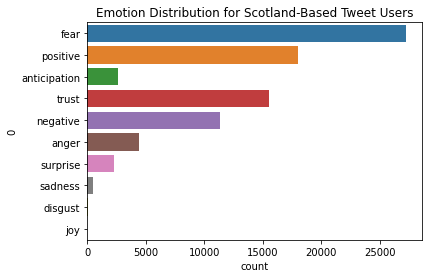

In [30]:
sns.countplot(data = scot_tweets, y = 0).set_title("Emotion Distribution for Scotland-Based Tweet Users")
plt.savefig('ScotlandEmotion.png')

### Emotion Detection for Ireland Authors

In [31]:
ire_data = newdata[newdata['author_location'].str.contains('Ireland',na = False, case=False)]
ire_data

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
11,284246357,samandpat11,"Dublin City, Ireland","@PoliticsJOE_UK "" he didn't know he was lying ...",2022-03-30 23:26:07+00:00,NaN,0.0,0.0,0.0,0.0,know lie lie parliament borisjohnson new defence
41,2267598867,NLinnane,Ireland,It's only starting and it's already giving me ...,2022-03-30 22:42:04+00:00,NaN,2.0,0.0,4.0,0.0,start already give tummy ache every week go li...
92,29269648,jfk2005,ireland,RT @Sea__Solitude: Im surprised there are not ...,2022-03-30 21:47:31+00:00,NaN,1.0,0.0,0.0,0.0,I m surprised riot amp mass protest street iri...
102,1689346278,ruggermurph27,Ireland,RT @IrexitFreedom: The @greenparty_ie exist t...,2022-03-30 21:39:57+00:00,NaN,10.0,0.0,0.0,0.0,exist make life miserable expensive want much ...
121,550188352,Sea__Solitude,Ireland,Im surprised there are not riots &amp; mass pr...,2022-03-30 21:28:39+00:00,NaN,1.0,3.0,8.0,0.0,I m surprised riot amp mass protest street iri...
...,...,...,...,...,...,...,...,...,...,...,...
541565,21563704,Lamhfada,"Galway, Ireland",RT @TUnionLeftForum: #CostOfLivingCrisis\n#edu...,2022-09-01 06:24:06+00:00,NaN,6.0,0.0,0.0,0.0,costoflivingcrisis educationcrisis housingcris...
541583,788692011004157952,kellyandrews149,Northern Ireland,"RT @CIHhousing: ""It’s clear that the governmen...",2022-09-01 06:17:01+00:00,NaN,12.0,0.0,0.0,0.0,clear government current support package touch...
541584,1425900275324366850,little_aine,"Belfast, Northern Ireland",RT @BrookesTimes: My cartoon Wednesday @TheTim...,2022-09-01 06:16:55+00:00,NaN,84.0,0.0,0.0,0.0,cartoon wednesday know show show liztruss tory...
541647,385443479,felixmlarkin,"Dublin, Ireland",RT @Cartoon4sale: Martin Rowson on two car cra...,2022-09-01 05:34:10+00:00,NaN,14.0,0.0,0.0,0.0,martin rowson two car crash liztruss princessd...


In [32]:
ire_tweets = ire_data[['Cleaned_tweets']]
ire_tweets

,Cleaned_tweets
11,know lie lie parliament borisjohnson new defence
41,start already give tummy ache every week go li...
92,I m surprised riot amp mass protest street iri...
102,exist make life miserable expensive want much ...
121,I m surprised riot amp mass protest street iri...
...,...
541565,costoflivingcrisis educationcrisis housingcris...
541583,clear government current support package touch...
541584,cartoon wednesday know show show liztruss tory...
541647,martin rowson two car crash liztruss princessd...


In [33]:
ire_tweets['emotions'] = ire_tweets['Cleaned_tweets'].apply(lambda x: NRCLex(x).top_emotions[0])
ire_tweets.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Cleaned_tweets,emotions
11,know lie lie parliament borisjohnson new defence,"(anger, 0.2222222222222222)"
41,start already give tummy ache every week go li...,"(negative, 0.3333333333333333)"
92,I m surprised riot amp mass protest street iri...,"(anger, 0.25)"
102,exist make life miserable expensive want much ...,"(anger, 0.25)"
121,I m surprised riot amp mass protest street iri...,"(anger, 0.16666666666666666)"


In [34]:
ire_tweets = pd.concat([ire_tweets.drop(['emotions'], axis = 1), ire_tweets['emotions'].apply(pd.Series)], axis = 1)
ire_tweets.head()

,Cleaned_tweets,0,1
11,know lie lie parliament borisjohnson new defence,anger,0.222222
41,start already give tummy ache every week go li...,negative,0.333333
92,I m surprised riot amp mass protest street iri...,anger,0.250000
102,exist make life miserable expensive want much ...,anger,0.250000
121,I m surprised riot amp mass protest street iri...,anger,0.166667


In [35]:
emotion_counts= ire_tweets[0].value_counts()
emotion_counts

fear            9463
positive        8157
trust           6030
negative        4377
anger           1351
anticipation     984
surprise         707
sadness          111
disgust           36
joy                3
Name: 0, dtype: int64

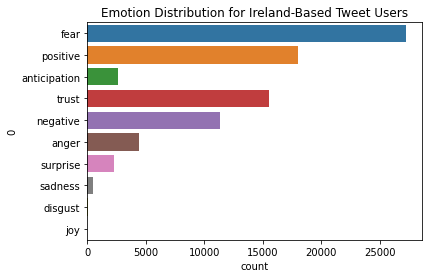

In [36]:
sns.countplot(data = scot_tweets, y = 0).set_title("Emotion Distribution for Ireland-Based Tweet Users")
plt.savefig('IrelandEmotion.png')

In [ ]:
# ! pip install transformers -q

In [ ]:
# from transformers import pipeline

In [ ]:
# emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

In [ ]:
# def get_emotion_label(text):
#   return(emotion(text)[0]['label'])

In [ ]:
# emotions3 = eng_data[['Cleaned tweets']]
# emotions3

In [ ]:
# emotions3['emotion'] = emotions3['Cleaned tweets'].apply(get_emotion_label)
# emotions3

In [ ]:
# import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

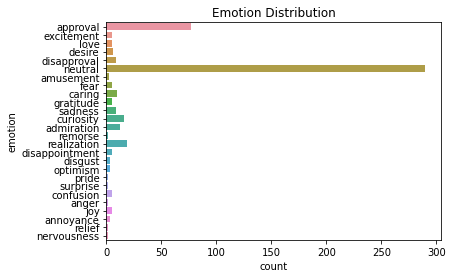

In [ ]:
# sns.countplot(data = eng_tweets1, y = 'emotion').set_title("Emotion Distribution")

In [ ]:
# eng_data = newdata[newdata['author_location'].str.contains('England|Wales|United Kingdom|Ireland|Scotland',na = False, case=False)]
# eng_data